# TP02: Voyageur de commerce TSP

**1. Générer le premier graphe à partir d'une matrice de distances entre les sommets**

In [18]:
def create_graph(index, A):
    G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
    mapping = {0:1, 1:2, 2:3, 3:4, 4:5}
    G = nx.relabel_nodes(G, mapping)
    layout = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw(G, layout,with_labels = True)
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
    plt.title("Graphe initial")
    plt.show()
    

**2. Générer un nouveau graphe à partir d'un tableau index de sommets**

In [20]:
def create_graph_array(index, A):
    G = nx.DiGraph()
    i = 0
    
    color_map = []
    for i in range(len(index)-1):
        G.add_edges_from([(index[i], index[i+1])], weight=A[i])
        if i ==0 or i == len(index)-1:
            color_map.append('green')
        else : 
            color_map.append('blue')
    labels = nx.get_edge_attributes(G, "weight")
    layout=nx.spring_layout(G)
    
    edge_colors = ['black' if  edge in [index[0],index[len(index)-1]] else 'red' for edge in G.edges()]
    
    nx.draw(G,layout, with_labels=True, edge_color=edge_colors, node_color=color_map)
    nx.draw_networkx_edge_labels(G,pos=layout,edge_labels=labels)
    plt.title("Le chemin optimal")
    plt.show()

**3. La fonction objectif, permet de calculer la distance totale du chemin emprunté**

In [3]:
def count_distance(index,matrix):
    dist = 0
    i = 0
    for i in range(len(index)-1):
        dist += matrix[index[i]-1][index[i+1]-1]
    return dist

**4. Algorithme du récuit simulé**

- X : l'index qui contient les sommets
- X_best : La distance best
- T, T0 : inchangées
- F(X) : la fonction de distance
- Permutation entre les indexes : générer Y proche de X

In [10]:
def func(distance,T0,N,T_finale, index, matrix):  

    distance_best = distance
    T = T0
    while(T>T_finale):
        i=0
        while(i<N):
            d1 , d2 = np_random.randint(1, len(index)-1,size =2)
            temp = index[d1]
            index[d1] = index[d2]
            index[d2] = temp
            distance = count_distance(index,matrix)       
            if(distance<distance_best):
                distance_best= distance 
            else:
                p = np_random.uniform(0,1)
                if(p< math.exp(-(distance-distance_best)/T)):
                    distance_best= distance 
                else :
                    temp = index[d1]
                    index[d1] = index[d2]
                    index[d2] = temp 
            i=i+1   
        T = T*0.099   
    print("La valeur de distance_best est : "+str(distance_best))
    return index
    

**5. Le main : Création de la matrice des distances, l'index initial, le graphe initial, et la distance initiale**

La distance initiale est égale à : 26


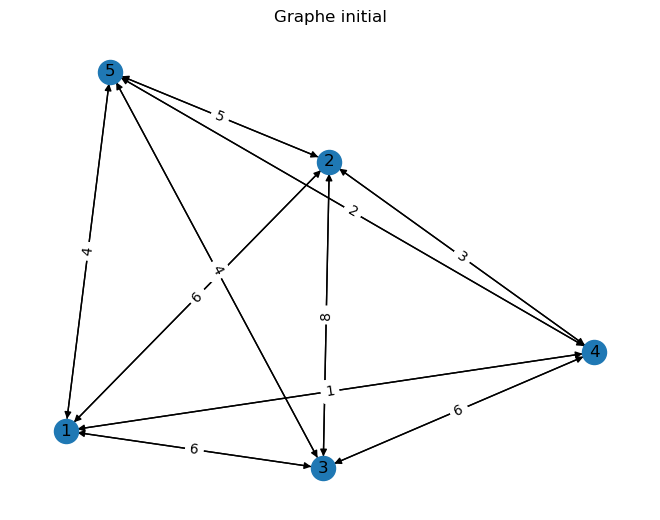

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
from numpy import random as np_random
index = [1,2,3,4,5,1]
A = [[0, 6, 6, 1,4], [6, 0, 8, 3, 5], [6, 8, 0, 6, 4] , [1, 3, 6, 0, 2], [4, 5, 4, 2, 0]]
distance = count_distance(index, A)
print("La distance initiale est égale à : "+ str(distance))
create_graph(index,A)

**6. Appel de la fonction du récuit simulé, et génération du graphe optimisé**

La valeur de distance_best est : 19


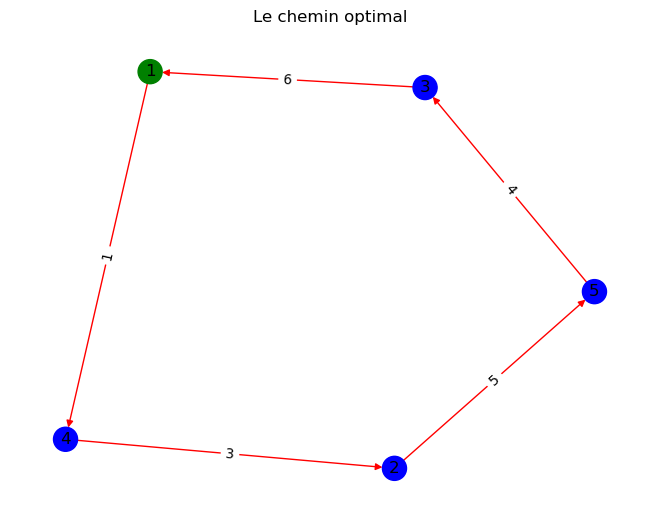

In [21]:
index = func(distance, T0=1000, N=50, T_finale = 0.0000009, index = index, matrix= A)
dist_array = []
i = 0
for i in range(len(index)-1):
    dist_array.append(A[index[i]-1][index[i+1]-1])
create_graph_array(index, dist_array)